In [59]:
from implicit.nearest_neighbours import bm25_weight
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix
import pandas as pd
import spotipy
import sys
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [60]:
from dotenv import load_dotenv
import os

load_dotenv()

# Create a spotify client:
client_id = os.environ.get("SPOTIFY_CLIENT_ID")
client_secret = os.environ.get("SPOTIFY_CLIENT_SECRET")

spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                                client_secret=client_secret))

In [61]:
def get_playlist_track(spotify, playlist_id, offset=0):
    df = pd.DataFrame(spotify.playlist_tracks(playlist_id, offset=offset))
    tracks = df['items']

    track_ids = []
    for row in tracks:
        track_ids.append(row['track']['id'])
    return [tracks, track_ids]

def get_audio_features(spotify, track_ids):
    """
    Returns each of the spotify audio features associated to each track in track ID's
    
    Input
        spotify; authenticated spotipy module
        track_ids; list of string, the list of track ids to check.
    Output
        audio_features: Dataframe, A dataframe where each row represents a track
    """
    track_audio_features = spotify.audio_features(track_ids)

    print(track_audio_features)
    return (track_audio_features)

### Whale Playlist:

In [62]:
whale_track_ids = get_playlist_track(spotify, "5v0XNgUfSqaDSZ6SkJkN7E")

print(whale_track_ids[1])

['3CAX47TnPqTujLIQTw8nwI', '15WbjBy1bzH1UsUldBwwlW', '6UIxGIqWlO5wsddY44AV1R', '2D369Iv0P8FplOVp5ZMel7', '5so4VqG1hJDiqyRqavbH6o', '1OtgKfkArIaanXT140hSmQ', '3hWfXpVhqsALMNxzGcCxeI', '0ZNYGrmcehorhh9JOeg5Iv', '7sgXta3uhimoaceAifvKbL', '4vRuPvw2HQi1ukIaKu107k', '3jQyadhLTxpxadQlkFh2b8', '5Ics32fcXJuInGCu9DPpqg', '6pQUQdaZacg722q6sg6fPR', '50M7nY1oQuNHecs0ahWAtI', '6DESft0qm6RhoYf5wzeoGH', '7lPN2DXiMsVn7XUKtOW1CS', '4HopuG8wQBlvXQ6xwA79FG', '3tnfHy341CDlAtcSmUtuOG', '3dYD57lRAUcMHufyqn9GcI', '4LGJ2pLDvTRnul3EcZoYkX', '0bkW98npv8EsWQ2fXFzK56', '4Q66chx9WzqWcLItXoZ5r4', '4h0zU3O9R5xzuTmNO7dNDU', '4pvb0WLRcMtbPGmtejJJ6y', '1HkOPLwAJH3kE8UnqgxF4s', '1D39ZETXfcAFYaGruPHEzB', '0AaV4MJrgmLV3XhoiWXjjb', '0RstfX9nRY1Lfuy1808MoT', '6HU7h9RYOaPRFeh0R3UeAr', '5n0CTysih20NYdT2S0Wpe8', '1MZISLnqzwG3xU6YuQHqPo', '2bqvn860XasNbI5OSHwjtt', '4LngVAmigX4WrBEDfonBlU', '3hhbDnFUb2bicI2df6VurK', '6xWk8stJukRGqcrozZYXFK', '3AJwUDP919kvQ9QcozQPxg', '24jvD83UgLmrdGjhWTFslY', '0D78d3HABkGeNtKqkCzwmS', '3BJe4B8zGn

In [63]:
whale_audio_features = pd.DataFrame(get_audio_features(spotify, whale_track_ids[1]))

whale_audio_features.head()

[{'danceability': 0.401, 'energy': 0.364, 'key': 5, 'loudness': -10.836, 'mode': 1, 'speechiness': 0.033, 'acousticness': 0.45, 'instrumentalness': 0.0503, 'liveness': 0.162, 'valence': 0.224, 'tempo': 129.57, 'type': 'audio_features', 'id': '3CAX47TnPqTujLIQTw8nwI', 'uri': 'spotify:track:3CAX47TnPqTujLIQTw8nwI', 'track_href': 'https://api.spotify.com/v1/tracks/3CAX47TnPqTujLIQTw8nwI', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3CAX47TnPqTujLIQTw8nwI', 'duration_ms': 328507, 'time_signature': 4}, {'danceability': 0.493, 'energy': 0.372, 'key': 7, 'loudness': -11.889, 'mode': 1, 'speechiness': 0.0331, 'acousticness': 0.964, 'instrumentalness': 0.0308, 'liveness': 0.117, 'valence': 0.25, 'tempo': 116.86, 'type': 'audio_features', 'id': '15WbjBy1bzH1UsUldBwwlW', 'uri': 'spotify:track:15WbjBy1bzH1UsUldBwwlW', 'track_href': 'https://api.spotify.com/v1/tracks/15WbjBy1bzH1UsUldBwwlW', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/15WbjBy1bzH1UsUldBwwlW', 'duration

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.401,0.364,5,-10.836,1,0.0330,0.450,0.05030,0.1620,0.2240,129.570,audio_features,3CAX47TnPqTujLIQTw8nwI,spotify:track:3CAX47TnPqTujLIQTw8nwI,https://api.spotify.com/v1/tracks/3CAX47TnPqTu...,https://api.spotify.com/v1/audio-analysis/3CAX...,328507,4
1,0.493,0.372,7,-11.889,1,0.0331,0.964,0.03080,0.1170,0.2500,116.860,audio_features,15WbjBy1bzH1UsUldBwwlW,spotify:track:15WbjBy1bzH1UsUldBwwlW,https://api.spotify.com/v1/tracks/15WbjBy1bzH1...,https://api.spotify.com/v1/audio-analysis/15Wb...,285160,4
2,0.386,0.205,4,-16.699,1,0.0366,0.653,0.04480,0.1060,0.6230,172.373,audio_features,6UIxGIqWlO5wsddY44AV1R,spotify:track:6UIxGIqWlO5wsddY44AV1R,https://api.spotify.com/v1/tracks/6UIxGIqWlO5w...,https://api.spotify.com/v1/audio-analysis/6UIx...,152613,4
3,0.556,0.269,5,-12.234,1,0.0502,0.946,0.00492,0.0834,0.1730,99.902,audio_features,2D369Iv0P8FplOVp5ZMel7,spotify:track:2D369Iv0P8FplOVp5ZMel7,https://api.spotify.com/v1/tracks/2D369Iv0P8Fp...,https://api.spotify.com/v1/audio-analysis/2D36...,273693,4
4,0.489,0.250,9,-12.766,1,0.0307,0.921,0.73600,0.1100,0.0562,128.286,audio_features,5so4VqG1hJDiqyRqavbH6o,spotify:track:5so4VqG1hJDiqyRqavbH6o,https://api.spotify.com/v1/tracks/5so4VqG1hJDi...,https://api.spotify.com/v1/audio-analysis/5so4...,316800,4


In [64]:
whale_audio_features.to_csv("./whale_audio_features")

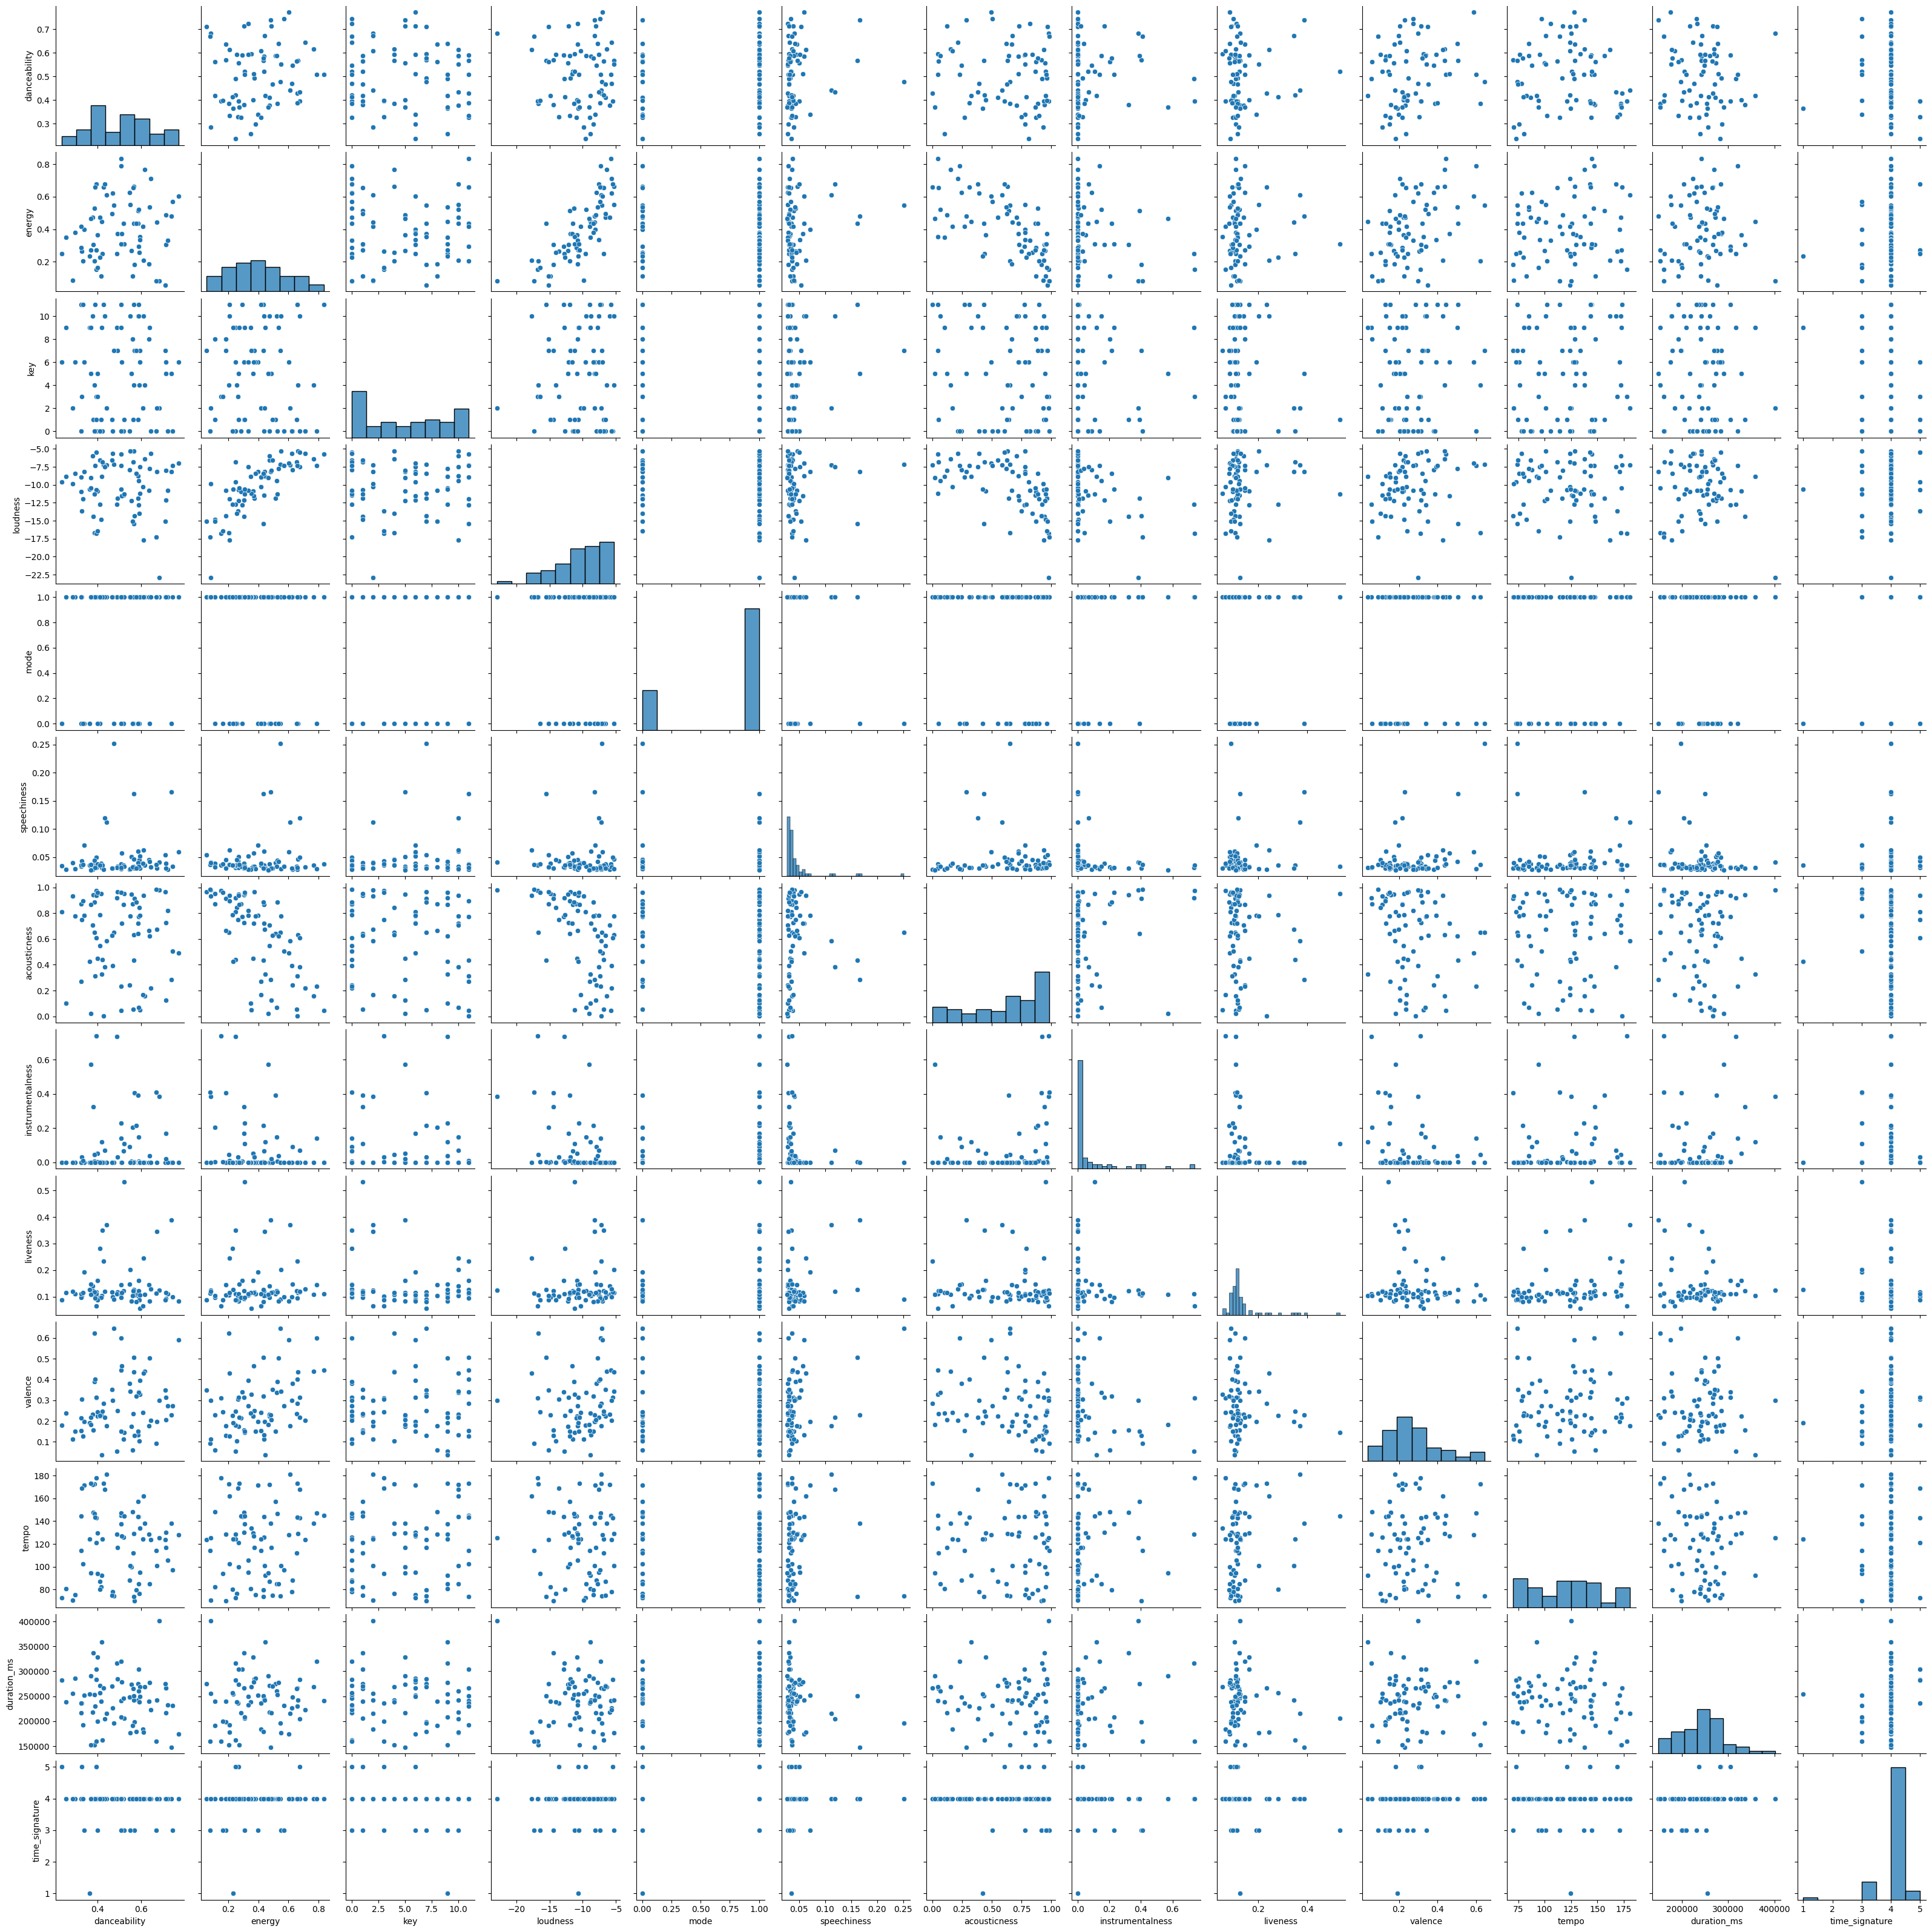

In [65]:
import seaborn as sns

sns.pairplot(whale_audio_features)

In [66]:
whale_audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.00000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,0.502274,0.398518,5.027397,-10.311479,0.753425,0.045911,0.61989,0.079008,0.137640,0.271527,120.643082,242604.808219,3.904110
std,0.131086,0.188886,3.883629,3.589100,0.434000,0.035534,0.30438,0.164879,0.082138,0.135744,31.683731,49974.674325,0.531361
min,0.236000,0.056500,0.000000,-22.895000,0.000000,0.027300,0.00239,0.000000,0.055900,0.038400,70.060000,147952.000000,1.000000
25%,0.395000,0.256000,1.000000,-12.111000,1.000000,0.030700,0.39200,0.000006,0.099200,0.178000,94.023000,208653.000000,4.000000
50%,0.508000,0.380000,5.000000,-9.883000,1.000000,0.035500,0.70700,0.000307,0.114000,0.237000,124.026000,242014.000000,4.000000
75%,0.592000,0.528000,9.000000,-7.376000,1.000000,0.042900,0.88500,0.065100,0.127000,0.339000,143.979000,271387.000000,4.000000
max,0.771000,0.835000,11.000000,-5.303000,1.000000,0.252000,0.98300,0.739000,0.531000,0.646000,180.917000,401426.000000,5.000000


### Test Playlist

In [67]:
test_playlist_four = get_playlist_track(spotify, "2Vjg4BQi0ILYyEN5lr9Lma",offset=300)

In [68]:
test_playlist_audio_features_four= pd.DataFrame(get_audio_features(spotify, test_playlist_four[1]))

[{'danceability': 0.558, 'energy': 0.615, 'key': 1, 'loudness': -5.641, 'mode': 1, 'speechiness': 0.229, 'acousticness': 0.0103, 'instrumentalness': 0, 'liveness': 0.105, 'valence': 0.16, 'tempo': 76.673, 'type': 'audio_features', 'id': '15qrWkkYCfmtu1uRpGf48L', 'uri': 'spotify:track:15qrWkkYCfmtu1uRpGf48L', 'track_href': 'https://api.spotify.com/v1/tracks/15qrWkkYCfmtu1uRpGf48L', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/15qrWkkYCfmtu1uRpGf48L', 'duration_ms': 324547, 'time_signature': 4}, {'danceability': 0.901, 'energy': 0.813, 'key': 7, 'loudness': -4.509, 'mode': 1, 'speechiness': 0.199, 'acousticness': 0.0325, 'instrumentalness': 1.09e-05, 'liveness': 0.144, 'valence': 0.502, 'tempo': 96.442, 'type': 'audio_features', 'id': '0x60P5taxdI5pcGbqbap6S', 'uri': 'spotify:track:0x60P5taxdI5pcGbqbap6S', 'track_href': 'https://api.spotify.com/v1/tracks/0x60P5taxdI5pcGbqbap6S', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0x60P5taxdI5pcGbqbap6S', 'duration_ms

In [69]:
test_playlist_audio_features_one.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.401,0.364,5,-10.836,1,0.0330,0.450,0.05030,0.1620,0.2240,129.570,audio_features,3CAX47TnPqTujLIQTw8nwI,spotify:track:3CAX47TnPqTujLIQTw8nwI,https://api.spotify.com/v1/tracks/3CAX47TnPqTu...,https://api.spotify.com/v1/audio-analysis/3CAX...,328507,4
1,0.493,0.372,7,-11.889,1,0.0331,0.964,0.03080,0.1170,0.2500,116.860,audio_features,15WbjBy1bzH1UsUldBwwlW,spotify:track:15WbjBy1bzH1UsUldBwwlW,https://api.spotify.com/v1/tracks/15WbjBy1bzH1...,https://api.spotify.com/v1/audio-analysis/15Wb...,285160,4
2,0.386,0.205,4,-16.699,1,0.0366,0.653,0.04480,0.1060,0.6230,172.373,audio_features,6UIxGIqWlO5wsddY44AV1R,spotify:track:6UIxGIqWlO5wsddY44AV1R,https://api.spotify.com/v1/tracks/6UIxGIqWlO5w...,https://api.spotify.com/v1/audio-analysis/6UIx...,152613,4
3,0.556,0.269,5,-12.234,1,0.0502,0.946,0.00492,0.0834,0.1730,99.902,audio_features,2D369Iv0P8FplOVp5ZMel7,spotify:track:2D369Iv0P8FplOVp5ZMel7,https://api.spotify.com/v1/tracks/2D369Iv0P8Fp...,https://api.spotify.com/v1/audio-analysis/2D36...,273693,4
4,0.489,0.250,9,-12.766,1,0.0307,0.921,0.73600,0.1100,0.0562,128.286,audio_features,5so4VqG1hJDiqyRqavbH6o,spotify:track:5so4VqG1hJDiqyRqavbH6o,https://api.spotify.com/v1/tracks/5so4VqG1hJDi...,https://api.spotify.com/v1/audio-analysis/5so4...,316800,4


In [70]:
test_playlist_audio_features = pd.concat([test_playlist_audio_features_one, test_playlist_audio_features_two, test_playlist_audio_features_three, test_playlist_audio_features_four])

In [71]:
test_playlist_audio_features.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.538515,0.498890,5.217500,-9.950297,0.642500,0.088902,0.476746,0.155587,0.170617,0.346262,117.794573,232668.337500,3.855000
std,0.177702,0.269094,3.528643,5.891676,0.479864,0.112306,0.367008,0.293239,0.137960,0.234744,32.612584,70513.380462,0.514428
min,0.062500,0.006180,0.000000,-31.855000,0.000000,0.025300,0.000122,0.000000,0.032800,0.029900,44.109000,22747.000000,1.000000
25%,0.416750,0.272750,2.000000,-12.463750,0.000000,0.033975,0.103000,0.000003,0.095500,0.159750,89.972500,192378.500000,4.000000
50%,0.552500,0.480500,5.000000,-8.856500,1.000000,0.042350,0.469500,0.001385,0.114500,0.289000,115.348000,231094.500000,4.000000
75%,0.670250,0.714750,8.000000,-5.923750,1.000000,0.080200,0.854000,0.129000,0.175000,0.502000,139.859750,269986.500000,4.000000
max,0.908000,0.995000,11.000000,0.496000,1.000000,0.947000,0.996000,0.967000,0.828000,0.963000,214.527000,676545.000000,5.000000


In [72]:
test_playlist_audio_features_without_my_playlist = test_playlist_audio_features[73:]

In [73]:
mean_speechiness = 0.045911
test_df = pd.DataFrame()

In [74]:
closest_rows = test_df.iloc[(
    test_df['speechiness']
    - mean_speechiness)
    .abs()
    .argsort()
    [:5]]

In [75]:
closest_rows

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
44,0.686,0.6820,6,-7.656,0,0.0459,0.0443,0.013100,0.4300,0.854,84.985,audio_features,0T7aTl1t15HKHfwep4nANV,spotify:track:0T7aTl1t15HKHfwep4nANV,https://api.spotify.com/v1/tracks/0T7aTl1t15HK...,https://api.spotify.com/v1/audio-analysis/0T7a...,192000,4
54,0.446,0.0965,4,-24.111,1,0.0458,0.9850,0.929000,0.1070,0.133,90.858,audio_features,69Fm9O838y94hhkxWsJkoY,spotify:track:69Fm9O838y94hhkxWsJkoY,https://api.spotify.com/v1/tracks/69Fm9O838y94...,https://api.spotify.com/v1/audio-analysis/69Fm...,227169,3
94,0.657,0.8610,0,-2.191,1,0.0456,0.0226,0.000194,0.6440,0.357,87.485,audio_features,354Cv7huFJnlEdVAHvhH3Q,spotify:track:354Cv7huFJnlEdVAHvhH3Q,https://api.spotify.com/v1/tracks/354Cv7huFJnl...,https://api.spotify.com/v1/audio-analysis/354C...,242769,4
40,0.413,0.2520,5,-12.611,0,0.0463,0.8610,0.768000,0.0912,0.231,146.940,audio_features,76BfKpZqnuNCZtbN8N3s4C,spotify:track:76BfKpZqnuNCZtbN8N3s4C,https://api.spotify.com/v1/tracks/76BfKpZqnuNC...,https://api.spotify.com/v1/audio-analysis/76Bf...,211198,4
62,0.152,0.1090,9,-17.133,1,0.0464,0.8720,0.895000,0.1680,0.114,57.143,audio_features,1ZauqNrrbC4pYMwMtA2S27,spotify:track:1ZauqNrrbC4pYMwMtA2S27,https://api.spotify.com/v1/tracks/1ZauqNrrbC4p...,https://api.spotify.com/v1/audio-analysis/1Zau...,407545,4


In [79]:

test_df = test_playlist_audio_features_without_my_playlist

In [81]:
import math

columns_to_check = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "valence", "tempo"]

means = whale_audio_features[columns_to_check].mean()

test_df['distance_from_mean'] = test_df[columns_to_check]
    .apply(
        lambda row: math.sqrt(sum((row - means)**2))
    ,axis=1)


In [58]:
closest_rows

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,distance_from_mean
76,0.651,0.488,9,-9.271,1,0.0571,0.0779,0.030100,0.110,0.233,120.075,audio_features,3xSN9JH0u8QCa9AquF5XvV,spotify:track:3xSN9JH0u8QCa9AquF5XvV,https://api.spotify.com/v1/tracks/3xSN9JH0u8QC...,https://api.spotify.com/v1/audio-analysis/3xSN...,209303,4,2.487385
63,0.852,0.466,9,-9.642,0,0.0743,0.2330,0.000496,0.219,0.840,120.175,audio_features,0V57cVCVlaU9vXIUBlQdg2,spotify:track:0V57cVCVlaU9vXIUBlQdg2,https://api.spotify.com/v1/tracks/0V57cVCVlaU9...,https://api.spotify.com/v1/audio-analysis/0V57...,310973,4,2.617034
78,0.553,0.578,4,-8.679,1,0.0299,0.2670,0.037700,0.267,0.407,120.993,audio_features,1KQsrNv2vEW7AXKTrFz0Ah,spotify:track:1KQsrNv2vEW7AXKTrFz0Ah,https://api.spotify.com/v1/tracks/1KQsrNv2vEW7...,https://api.spotify.com/v1/audio-analysis/1KQs...,284147,4,2.758287
49,0.856,0.496,11,-8.879,0,0.1820,0.1790,0.001070,0.215,0.289,119.975,audio_features,52pGXXhSsBPx3jOSxlU35N,spotify:track:52pGXXhSsBPx3jOSxlU35N,https://api.spotify.com/v1/tracks/52pGXXhSsBPx...,https://api.spotify.com/v1/audio-analysis/52pG...,178000,4,3.224160
92,0.870,0.637,5,-8.368,0,0.0614,0.4970,0.000031,0.205,0.780,120.990,audio_features,0gEcmyKlIUoi3sHTFVO1bE,spotify:track:0gEcmyKlIUoi3sHTFVO1bE,https://api.spotify.com/v1/tracks/0gEcmyKlIUoi...,https://api.spotify.com/v1/audio-analysis/0gEc...,190561,4,3.622434


In [82]:
columns_to_check = ["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "valence", "tempo"]

means = whale_audio_features[columns_to_check].mean()
stds = test_df[columns_to_check].std()

test_df['distance_from_mean'] = test_df[columns_to_check].apply(lambda row: math.sqrt(sum(((row - means)/stds)**2)),axis=1)


In [83]:
test_df.sort_values("distance_from_mean").head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,distance_from_mean
66,0.459,0.472,8,-11.412,0,0.0479,0.583,0.000115,0.1110,0.246,139.847,audio_features,4XT9wAQ1malGGztBCmVX3m,spotify:track:4XT9wAQ1malGGztBCmVX3m,https://api.spotify.com/v1/tracks/4XT9wAQ1malG...,https://api.spotify.com/v1/audio-analysis/4XT9...,204000,4,0.761995
57,0.607,0.405,9,-8.607,1,0.0265,0.539,0.000007,0.2310,0.233,129.543,audio_features,3ou9rSNUQnE7XYmJkUUIOc,spotify:track:3ou9rSNUQnE7XYmJkUUIOc,https://api.spotify.com/v1/tracks/3ou9rSNUQnE7...,https://api.spotify.com/v1/audio-analysis/3ou9...,223040,4,0.791283
81,0.596,0.544,0,-11.759,1,0.0362,0.604,0.017000,0.2620,0.262,115.022,audio_features,7x46YkKAwp3yZpaa72n5Mu,spotify:track:7x46YkKAwp3yZpaa72n5Mu,https://api.spotify.com/v1/tracks/7x46YkKAwp3y...,https://api.spotify.com/v1/audio-analysis/7x46...,279000,4,0.810795
39,0.528,0.416,9,-8.523,1,0.0305,0.691,0.000276,0.0953,0.184,99.868,audio_features,6hH2y9wgEjgsSeJuv7kfaU,spotify:track:6hH2y9wgEjgsSeJuv7kfaU,https://api.spotify.com/v1/tracks/6hH2y9wgEjgs...,https://api.spotify.com/v1/audio-analysis/6hH2...,152280,5,0.862744
44,0.556,0.261,4,-11.668,1,0.0289,0.797,0.016000,0.0893,0.219,110.841,audio_features,0bndF6tTweNXPjwpPL7Slt,spotify:track:0bndF6tTweNXPjwpPL7Slt,https://api.spotify.com/v1/tracks/0bndF6tTweNX...,https://api.spotify.com/v1/audio-analysis/0bnd...,172500,4,0.890410
